# OSCILLAZIONI FORZATE

In [1]:
import numpy as np
import pandas as pd
import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'oscillazioni_forzate_smorzate.csv'
fr = pd.read_csv(FILE)

omega = np.array(fr['omega']) # rad/s
A = np.array(fr['A']) * 0.01 # m

## interpolazione $A(\omega)$

$A(\omega) = \frac{M}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\gamma^2\omega^2}}$

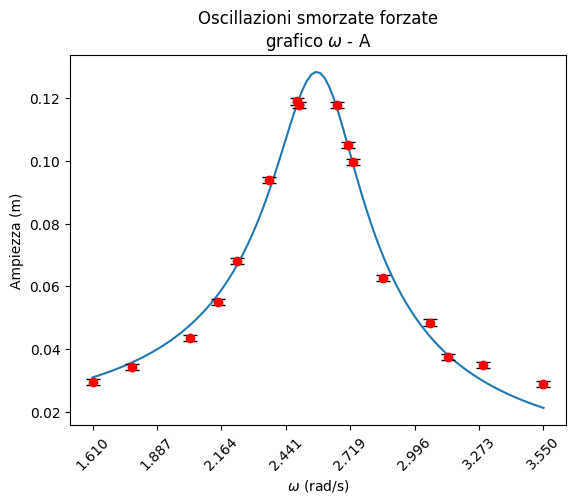

   
Parameters: {'M': 0.12881003724525417, 'w0': 2.58887356390202, 'gamma': 0.19422178121027237} 
Sigma parameters: {'M': 0.004179462453698949, 'w0': 0.006224997253285545, 'gamma': 0.009350703815289024}

sigmaY: 0.0009842426706738183
chiquadro ridotto: 16.0
df: 13
pvalue: 0.2%

covariance matrix: [[1.74679064e-05 5.01144356e-06 3.58116429e-05]
 [5.01144356e-06 3.87505908e-05 9.47120428e-06]
 [3.58116429e-05 9.47120428e-06 8.74356618e-05]]    

omega_0:  2.59 ± 0.01 


In [2]:
from interpolazione3 import Interpolazione, final_val
from matplotlib import pyplot as plt

def A_w(w, M, w0, gamma):
    return M/np.sqrt((w0**2 - w**2)**2 + 4 * gamma**2 * w**2)

interp = Interpolazione(omega,A,A_w,names=['M','w0','gamma'])

plt.plot(interp.x_best, interp.y_best)
plt.errorbar(omega,A,yerr=interp.sigmaY,fmt='o',color='red',ecolor="black",capsize=5)
plt.title('Oscillazioni smorzate forzate\ngrafico $\omega$ - A')
plt.ylabel("Ampiezza (m)")
plt.xlabel("$\omega$ (rad/s)")
plt.xticks(list(np.linspace(min(omega),max(omega),8)),rotation=45) # + [2.576,2.62]
plt.show()

print(interp)
print('omega_0: ', final_val(interp.bval['w0'],interp.sigma_bval['w0']))